# Day 20: Support Vector Machines (SVM) 🖇️

## What is SVM?
- SVM is a **supervised ML algorithm** used for **classification** and **regression**.
- Finds the **best hyperplane** that separates classes with **maximum margin**.
- Can handle **linear and non-linear data** using **kernel trick**.

### Key Concepts:
- **Support Vectors:** Data points closest to the hyperplane; define the margin.
- **Margin:** Distance between hyperplane and nearest data points.
- **Kernels:** Transform data into higher dimensions to make it linearly separable.
  - Linear, Polynomial, RBF (Gaussian), Sigmoid


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import seaborn as sns


## 1️⃣ SVM for Classification (Iris Dataset)


In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use first 2 features for visualization
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with RBF kernel
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6888888888888889

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.53      0.60      0.56        15
           2       0.54      0.47      0.50        15

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45



## Confusion Matrix


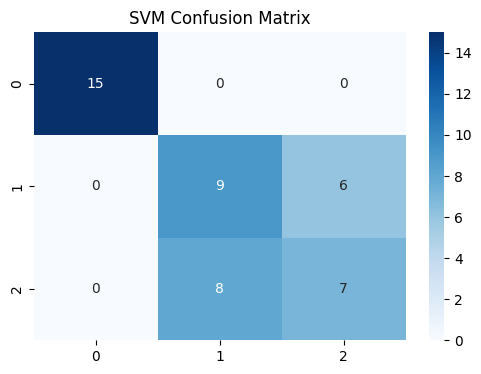

In [3]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()


## Visualize Decision Boundary (2D features)


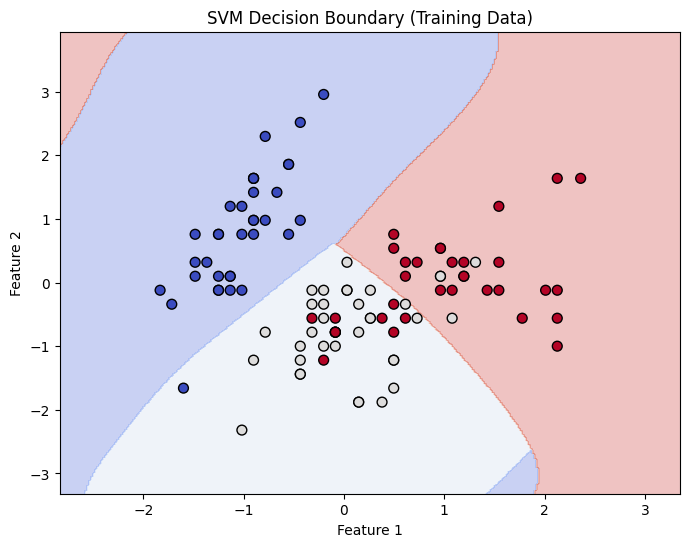

In [4]:
# Create mesh grid
x_min, x_max = X_train_scaled[:,0].min() - 1, X_train_scaled[:,0].max() + 1
y_min, y_max = X_train_scaled[:,1].min() - 1, X_train_scaled[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, s=50, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("SVM Decision Boundary (Training Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 2️⃣ SVM for Regression (SVR)


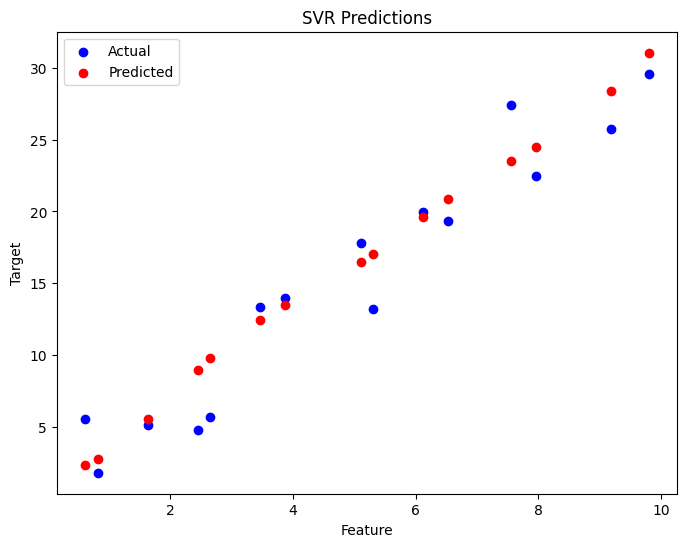

MSE: 6.260904441448675


In [6]:
# Create synthetic data
X_reg = np.linspace(0, 10, 50).reshape(-1,1)
y_reg = 3*X_reg.flatten() + np.random.randn(50)*2  # simple linear relation with noise

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train SVR with RBF kernel
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_r, y_train_r)

# Predictions
y_pred_r = svr.predict(X_test_r)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_test_r, y_test_r, color='blue', label="Actual")
plt.scatter(X_test_r, y_pred_r, color='red', label="Predicted")
plt.title("SVR Predictions")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

print("MSE:", mean_squared_error(y_test_r, y_pred_r))


### 🔑 Key Takeaways:
- SVM is powerful for **classification & regression**.
- Works well in **high-dimensional spaces**.
- **Kernel trick** allows solving non-linear problems.
- Hyperparameters: **C (regularization), gamma, kernel type**.
